In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../train.csv.crdownload")

data.Category.value_counts()

Category
Education                    410
Electrical Engineering       384
Mechanical Engineer          384
Consultant                   368
Sales                        364
Civil Engineer               364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Operations Manager           345
Building and Construction    345
Testing                      344
Architecture                 344
Aviation                     340
Business Analyst             340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313
Web Designing                309
SAP Developer                304
Data Science                 299
E

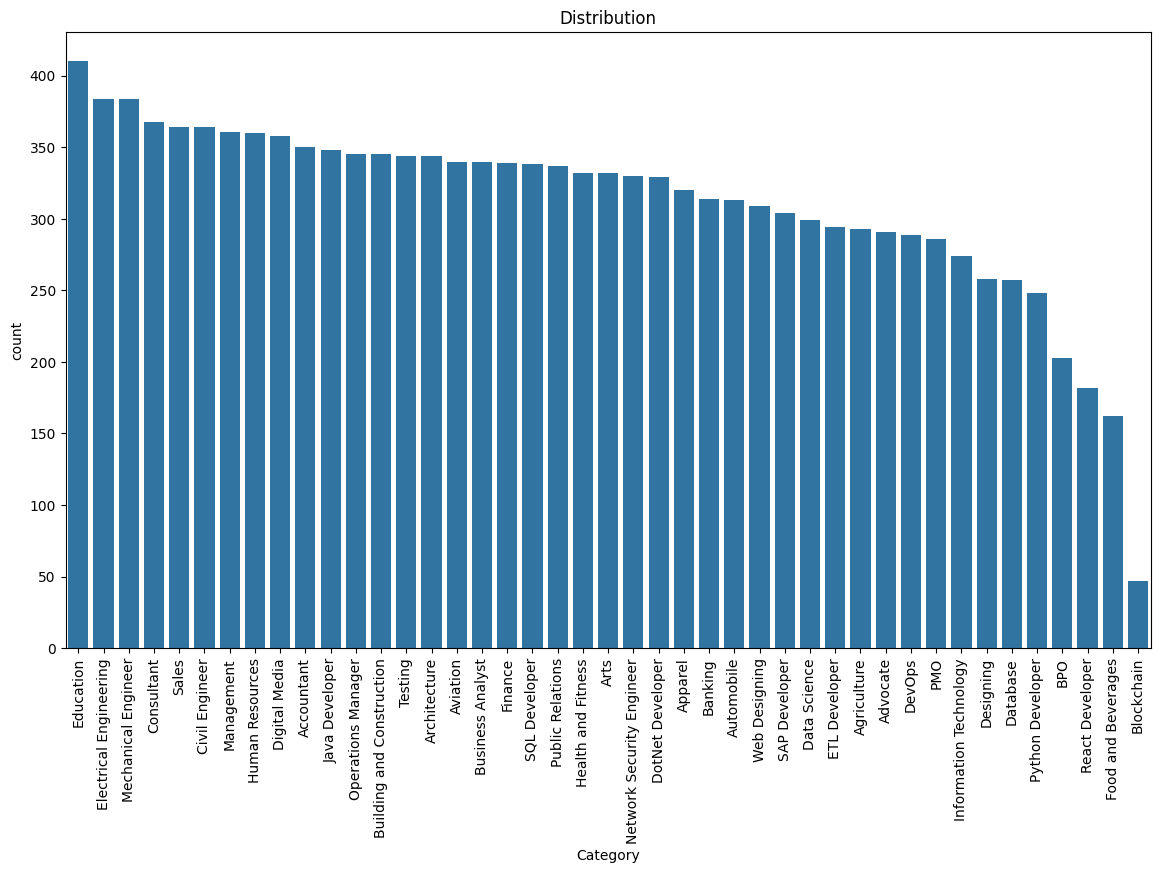

In [4]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution')
plt.show()

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    
    #removing stop words like if, and, of, etc and lemmatizing i.e. converting running to run or jumping to jump
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data['clean_text'] = data['Text'].apply(preprocess)

We have cleaned the data in the file, made all the words lowercase, removed punctuation marks, eliminated words like if, of, and which do not add any extra meaning to the words and context (stop words) and used lemmatization to convert words into their primary form. The below is the operation applied to the first line of the file.

This step is really necessary so that the model can focus on the main part of the content and does not take useless characters into consideration. Now it contains all the important words in the statement.

In [6]:
data['clean_text'][0]

'education omba executive leadership university texas 20162018 bachelor science accounting richland college 20052008 training certification certified management accountant cma certified financial modeling valuation analyst compliance antimoney laundering 092016 american institute banking certified public account cpa lean six sigma green belt certified trade product financial regulation 082016 american institute banking achievement speaker bringing leader within 082019 successfully presented empowering speech leadership 500 participant speaker dallas convention cpa 032019 successfully delivered seminar 3k cpa convention guest teaching experience online teacher udemy 2017 taught online accounting nonaccountant course udemy similar online teaching platform developed effective teaching module material curriculum target student took feedback student assist improving teaching methodology material professional membership affiliation american society executive 2018 present technical skill quic

Now we will encode the different categories of data like accountant, politics, sports, tech, etc in label encoders. We do this to form the differnt categories into numerical list so that we can access them and order them properly. After that, dividing the data into training data and testing data so that we have some data to test the trained model on. 

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Category'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [8]:
print(label_mapping)

{'Accountant': np.int64(0), 'Advocate': np.int64(1), 'Agriculture': np.int64(2), 'Apparel': np.int64(3), 'Architecture': np.int64(4), 'Arts': np.int64(5), 'Automobile': np.int64(6), 'Aviation': np.int64(7), 'BPO': np.int64(8), 'Banking': np.int64(9), 'Blockchain': np.int64(10), 'Building and Construction': np.int64(11), 'Business Analyst': np.int64(12), 'Civil Engineer': np.int64(13), 'Consultant': np.int64(14), 'Data Science': np.int64(15), 'Database': np.int64(16), 'Designing': np.int64(17), 'DevOps': np.int64(18), 'Digital Media': np.int64(19), 'DotNet Developer': np.int64(20), 'ETL Developer': np.int64(21), 'Education': np.int64(22), 'Electrical Engineering': np.int64(23), 'Finance': np.int64(24), 'Food and Beverages': np.int64(25), 'Health and Fitness': np.int64(26), 'Human Resources': np.int64(27), 'Information Technology': np.int64(28), 'Java Developer': np.int64(29), 'Management': np.int64(30), 'Mechanical Engineer': np.int64(31), 'Network Security Engineer': np.int64(32), 'Ope

In [9]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['clean_text'].tolist(), 
    data['label'].tolist(),
    test_size=0.2,
    random_state=42
)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encode = tokenizer( train_texts, truncation = True, padding = True, max_length = 128, return_tensors = 'pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length = 128, return_tensors='pt')
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)


In [10]:
print(train_encode['input_ids'][0])

tensor([  101,  2585,  5982,  7610,  2361, 10373,  2585,  7520, 25856,  2213,
         6072, 11314, 15782,  3042,  1039, 28203,  2620, 15136, 28311,  2581,
         2487,  6337, 13746,  3026,  3208,  2321,  2095,  2398,  2239,  3325,
        13912,  2565,  2622,  7610,  2080,  4031,  2136,  2968,  7578,  4281,
         4087, 24465,  2181,  3325,  4526,  4432,  5656,  9445,  2449,  2968,
         4007,  2458, 17338, 15810,  3401,  4642,  4646,  7367,  2213, 27457,
         4773,  5656, 12771,  2449,  4187,  2592,  2291,  2622,  7396,  2284,
         2167,  2637,  2885,  2658,  3325,  6305,  9006, 24759, 21808,  2015,
        23647, 13767,  3208,  1999, 10054, 18499, 14876, 12798,  2622, 15476,
         2249, 28994,  4765,  2622,  2968,  2436,  7610,  2080,  2499,  4876,
         7610,  2136,  3026,  4105,  4503, 10408,  7610,  2080,  2164,  4325,
         2622,  2166, 23490,  7705, 10615,  3115, 12550, 24951, 21558,  2136,
         2322,  2622,  3208, 12771, 22480,  3429,  2213,   102])

This tokenizer uses the Bert vocabulary to divide the sentence into tokens and provide an unique id to each token. The parameters used in tokenizing are truncation which means to cut off longer texts to the max size, padding gives extra space to smaller texts to make all the tokens of same size, and the return type is a pytorch tensor.

what i understood from the output is for the [CLS] and [SEP] special tokens the token value is 101 and 102.

In [11]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self,encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {key:val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    
    def __len__(self):
        return len(self.labels)
    
train_dataset = NewsDataset(train_encode, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

Using the encoded data and the labels we are creating pytorch tensors for each item so that pytorch can understand this dataset.
Now we will create the dataset loaders which loads the data in batches of size 16. The training loader has its contents shuffled so that we can prevent overfitting but the val loader is not because we dont need to, it will be used to validate the model.

In [12]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [13]:
from transformers import BertForSequenceClassification
import torch.optim as optim

num_labels = len(set(data['label']))
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = num_labels)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=2e-5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We have formed the model and our optimizer will be AdamW which is one of the most used optimizers generally and it is better than the normal Adam optimizer because it applies weight decay directly to the weights and provides more effective regularization for models like BERT. 
Now we will train the model on our data.

✅ GPU is being used.
Epoch 1/3:
  Train Loss: 0.5261
  Val Loss:   0.8019
  Accuracy:   0.8208
  Precision:  0.8268
  Recall:     0.8208
  F1 Score:   0.8195
------
Epoch 2/3:
  Train Loss: 0.3971
  Val Loss:   0.7700
  Accuracy:   0.8260
  Precision:  0.8310
  Recall:     0.8260
  F1 Score:   0.8253
------
Epoch 3/3:
  Train Loss: 0.3102
  Val Loss:   0.8068
  Accuracy:   0.8215
  Precision:  0.8286
  Recall:     0.8215
  F1 Score:   0.8214
------


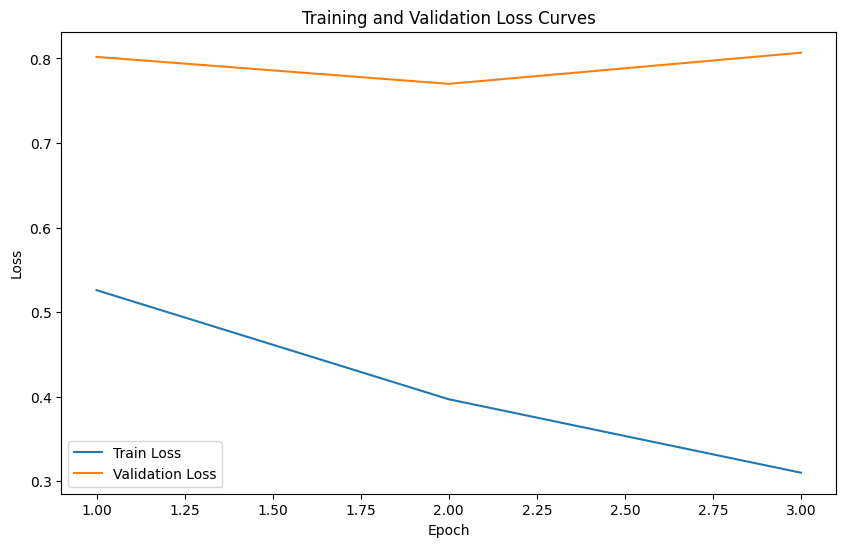

In [18]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 3

train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for batch_idx, batch in enumerate(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss:   {avg_val_loss:.4f}")
    print(f"  Accuracy:   {accuracy:.4f}")
    print(f"  Precision:  {precision:.4f}")
    print(f"  Recall:     {recall:.4f}")
    print(f"  F1 Score:   {f1:.4f}")
    print("------")

# Plot loss curves
plt.figure(figsize=(10,6))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


we have analyzed our model by evaluating it on the validation set and calculating different evaluation metrics like accuracy, precision, f1 scores and recall. The above are the final scores for the different evaluating parameters and the train loss and validation loss graphs. 

Now I will try to give random statemetns to the model to predict.

In [24]:
def predict_text(text):
    model.eval()
    encoding = tokenizer(text, truncation=True, padding=True, return_tensors='pt')
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = output.logits
        pred_idx = torch.argmax(logits, dim=1).item()
    
    pred_label = label_encoder.inverse_transform([pred_idx])[0]
    return pred_idx, pred_label

custom_text = "Stock market saw a significant rise"
pred_idx, pred_label = predict_text(custom_text)

print(f"Predicted Label Index: {pred_idx}")
print(f"Predicted Category: {pred_label}")


Predicted Label Index: 24
Predicted Category: Finance
